In [ ]:
# Italy

In [18]:
using PyPlot
using SeisIO;

In [19]:
data=readmseed("BERNI_FUORN_Thurweiser_SwissSeismologicalService.mseed");

In [14]:
HHE = data[1].x;
HHN = data[2].x;
HHZ = data[3].x;

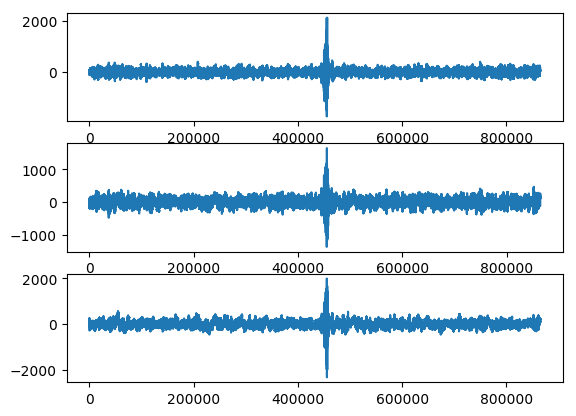

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x13f2fa050>

In [15]:
subplot(3,1,1)
plot(HHE)
subplot(3,1,2)
plot(HHN)
subplot(3,1,3)
plot(HHZ)

In [12]:
su =ones (400)*(1/400)
Edata = filt(su,1,datE[;2])

LoadError: [91msyntax: space before "(" not allowed in "ones ("[39m

In [13]:
data[4]

SeisChannel with 864306 samples
    ID: CH.FUORN..HHN                                                   
  NAME: CH.FUORN..HHN                                                   
   LAT: 0.0                                                             
   LON: 0.0                                                             
   ELE: 0.0                                                             
    AZ: 0.0                                                             
   INC: 0.0                                                             
    FS: 120.0                                                           
  GAIN: 1.000e+00                                                       
  RESP:                                                                 
                                                                        
 UNITS:                                                                 
   SRC:                                                                 
 NOTES: 1 entries  